## SVM


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import plotly.express as px
import os

# 환경 변수 설정으로 로그 제어
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
# 데이터 로드 및 전처리
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target_names[iris.target]

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


현재 150개의 샘플로 구성, 4개의 특성과 1개의 타겟을 가진 데이터셋  


**타겟(class)**

- 0: Iris setosa
- 1: Iris versicolor
- 2: Iris virginica

**특성(Features)**

- **`sepal length (cm)`**: 꽃받침의 길이
- **`sepal width (cm)`**: 꽃받침의 너비
- **`petal length (cm)`**: 꽃잎의 길이
- **`petal width (cm)`:** 꽃잎의 너비


In [ ]:
df['class'].value_counts()

,count
class,
setosa,50
versicolor,50
virginica,50


- 각 품종당 50개씩

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- 8:2 비율로 진행

In [ ]:
# 그리드 서치를 통한 최적 파라미터 탐색
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적 모델 선택
best_model = grid_search.best_estimator_

In [ ]:
# 모델 평가
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"최적 모델 정확도: {accuracy:.3f}")
print("\n분류 보고서:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

최적 모델 정확도: 0.967

분류 보고서:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## 혼동 행렬 시각화

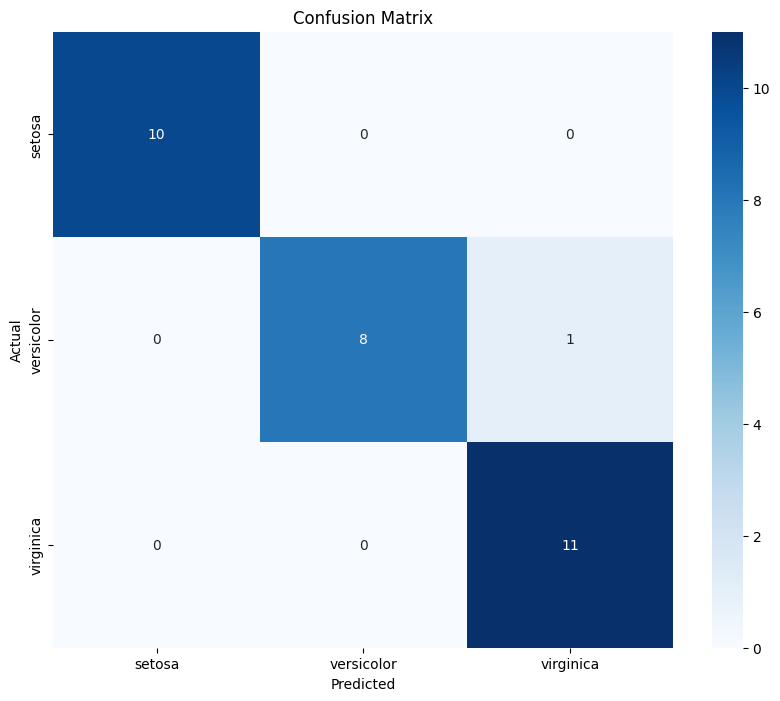

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- `versicolor` 한 개를 `virginica`로 잘못 분류한 샘플 확인
- 이를 해결하기 위해 데이터 샘플을 늘리거나, 다른 특성을 활용해도 좋고, 하이퍼파라미터를 수정해보는 옵션도 고려 가능

## 학습 곡선

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_scaled, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

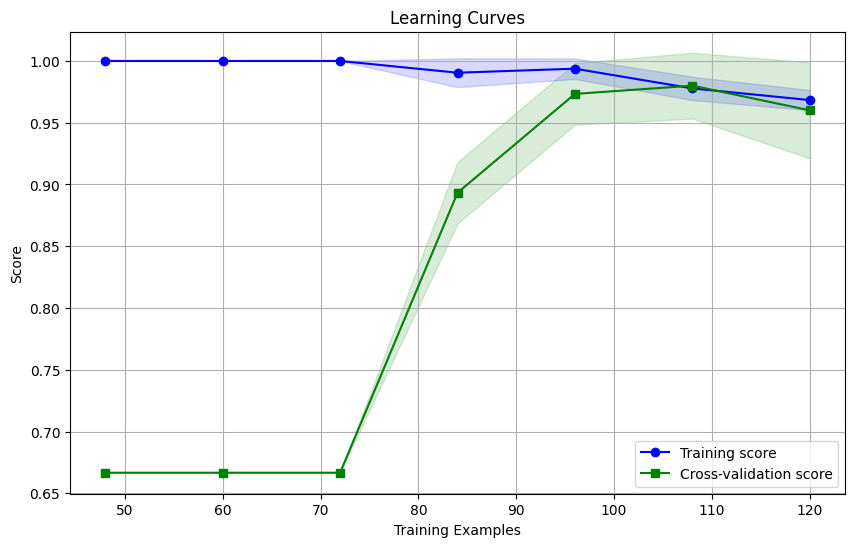

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- 모델의 과적합(오버피팅) 여부 진단하는 것이 목적

---

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 1. 꽃잎 모양의 방사형 그래프

In [ ]:
def plot_flower_radar(X, y):
    # X 데이터 (특성값들)를 DataFrame으로 변환하고, 각 열을 iris 데이터셋의 특성 이름으로 설정
    df = pd.DataFrame(X, columns=iris.feature_names)
    df['species'] = iris.target_names[y]  # y (클래스 레이블)를 'species' 열로 추가하여 종 이름으로 변환

    # 각 종별로 특성들의 평균값을 계산 (각 종에 대한 평균적인 특성값을 얻음)
    mean_df = df.groupby('species').mean().reset_index()

    # 데이터 재구성: 종(species)와 특성(feature) 값을 긴 형식으로 변환
    # 이는 Plotly에서 레이더 차트와 같은 형태로 데이터를 시각화하기 위해 필요
    mean_df_long = pd.melt(mean_df, id_vars=['species'], var_name='feature', value_name='value')

    # 레이더 차트 생성
    fig = px.line_polar(mean_df_long, r='value', theta='feature', color='species', line_close=True,
                        title="Average Iris Features as Flower Petals")
    # r='value': 각 축의 길이는 해당 특성의 평균값
    # theta='feature': 각 특성은 축에 대응
    # color='species': 종에 따라 다른 색으로 구분
    # line_close=True: 레이더 차트의 선을 닫아 꽃잎 모양을 만들도록 설정
    fig.show()  # 차트 출력

plot_flower_radar(X, y)

- 각 축이 개별 특성 즉 길이가 크기를 의미
- 각 특성이 어떤 방식으로 상호작용 하는지 쉽게 확인 가능

# 2. 3D 산점도와 결정 경계

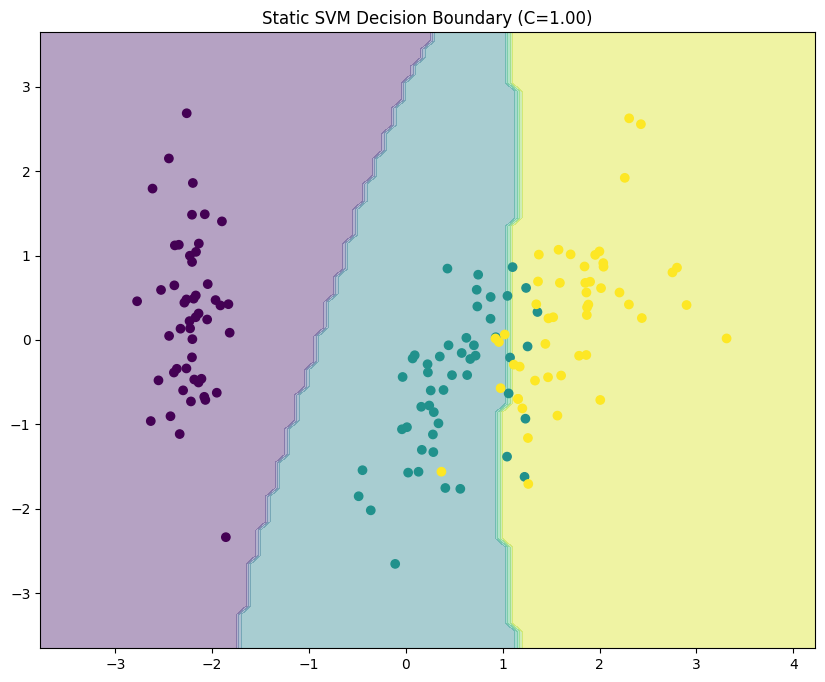

In [ ]:
def plot_static_decision_boundary(X, y, C=1.0):
    pca = PCA(n_components=2)  # 2차원 시각화를 위해 PCA로 데이터를 2개의 주성분으로 변환
    X_pca = pca.fit_transform(X)  # X 데이터를 2차원 주성분 공간으로 변환

    # 각 축의 최소값과 최대값을 계산하여 그리드 생성 범위 설정
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

    # 0.1 간격으로 2D 그리드 생성 (x, y 좌표 공간)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # SVM 모델 설정 (RBF 커널 사용, C는 규제 파라미터, gamma는 커널의 영향 범위)
    model = SVC(kernel='rbf', C=C, gamma=0.1)  # C=1.0은 적절한 규제 강도를 나타냄
    model.fit(X_pca, y)  # PCA로 축소된 2차원 데이터(X_pca)와 실제 레이블(y)로 모델 학습

    # 그리드 상의 모든 점에 대해 모델의 예측값을 계산
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # 예측값을 그리드와 동일한 형태로 변환

    # 플롯 생성 및 시각화
    plt.figure(figsize=(10, 8))  # 그래프 크기를 (10, 8)로 설정
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')  # 결정 경계를 등고선 형태로 채움 (alpha=0.4로 약간 투명하게 설정)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # 실제 데이터를 점으로 플로팅 (색상은 실제 클래스에 따라)
    plt.title(f'Static SVM Decision Boundary (C={C:.2f})')  # 그래프 제목에 C 값을 포함해 표시
    plt.show()  # 플롯을 화면에 출력

plot_static_decision_boundary(X_scaled, y, C=1.0)

In [ ]:
def plot_3d_decision_boundary(X, y, model):
    pca = PCA(n_components=3)  # 3차원 시각화를 위해 PCA로 데이터를 3개의 주성분으로 변환
    X_pca = pca.fit_transform(X)  # X 데이터를 3차원 주성분 공간으로 변환

    # 각 축의 최소값과 최대값을 계산하여 그리드 생성 범위 설정
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    z_min, z_max = X_pca[:, 2].min() - 1, X_pca[:, 2].max() + 1

    # 0.5 간격으로 3차원 그리드 생성 (x, y, z 좌표 공간)
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.5),
                             np.arange(y_min, y_max, 0.5),
                             np.arange(z_min, z_max, 0.5))

    # 그리드 상의 모든 점에 대해 모델의 예측값을 계산 (PCA 역변환 후)
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]))
    Z = Z.reshape(xx.shape)  # 예측값을 그리드와 동일한 형태로 변환

    # 3D 산점도 및 결정 경계 시각화
    fig = go.Figure(data=[
        # 3D 산점도 (입력 데이터의 PCA 변환 후 좌표를 표시)
        go.Scatter3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
                     mode='markers',  # 산점도를 점으로 표시
                     marker=dict(
                         size=5,  # 각 점의 크기
                         color=y,  # 점의 색상은 실제 클래스(y)에 따라 결정
                         colorscale='Viridis',  # 색상 스케일을 'Viridis'로 설정 (다양한 색상으로 클래스 구분)
                         opacity=0.8  # 각 점의 투명도를 0.8로 설정 (완전히 불투명하지 않도록)
                     )),
        # 3D 결정 경계 시각화
        go.Volume(x=xx.flatten(), y=yy.flatten(), z=zz.flatten(),
                  value=Z.flatten(),  # 모델의 예측값에 따른 경계 표시
                  opacity=0.1,  # 결정 경계의 투명도를 0.1로 설정 (반투명)
                  surface_count=20,  # 경계 표면의 밀도를 20으로 설정 (경계의 부드러움 조절)
                  colorscale='Viridis')  # 결정 경계의 색상도 'Viridis'로 설정하여 일관성 유지
    ])

    # 레이아웃 업데이트 (축 레이블 및 제목 설정)
    fig.update_layout(title='3D Decision Boundary',
                      scene=dict(xaxis_title='PC1',  # x축 레이블 (첫 번째 주성분)
                                 yaxis_title='PC2',  # y축 레이블 (두 번째 주성분)
                                 zaxis_title='PC3'))  # z축 레이블 (세 번째 주성분)


    fig.show()

# 3D 결정 경계를 시각화하는 함수 호출 (이미 학습된 best_model 사용)
plot_3d_decision_boundary(X_scaled, y, best_model)

# 3. 하이퍼파라미터(c) 변화에 따른 결정 경계 변화

In [ ]:
# PCA를 사용하여 2D로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

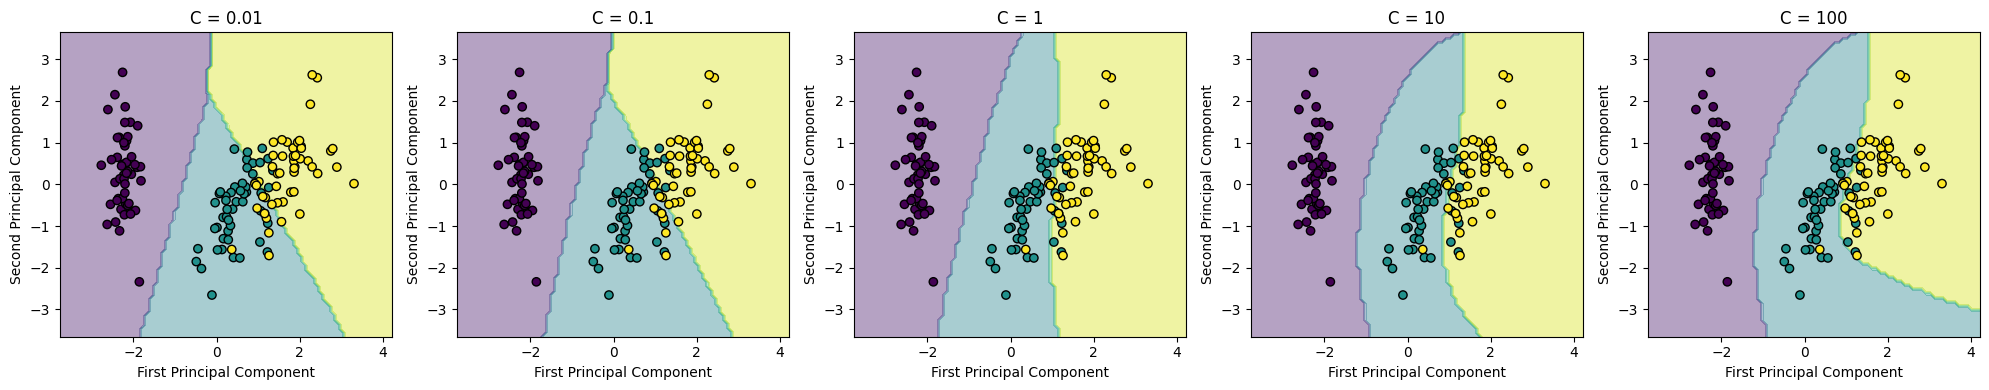

In [ ]:
def plot_decision_boundary(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # X 데이터의 첫 번째 주성분(PC1)의 최소/최대 값에서 각각 1을 빼고 더해, 그리드의 범위를 약간 확장
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # X 데이터의 두 번째 주성분(PC2)에 대해 마찬가지로 진행
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # 0.1 간격으로 x축 그리드 생성
                         np.arange(y_min, y_max, 0.1))  # 0.1 간격으로 y축 그리드 생성

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # 그리드 상의 모든 점에 대해 모델의 예측값을 계산
    Z = Z.reshape(xx.shape)  # 예측값을 그리드와 같은 형태로 변환

    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')  # 결정 경계를 채운 형태로 플로팅 (등고선 그래프)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='black')  # 실제 데이터 포인트를 플로팅 (색은 실제 클래스에 따라)
    ax.set_title(title)  # 각 플롯의 제목 설정
    ax.set_xlabel('First Principal Component')  # x축 레이블 설정 (첫 번째 주성분)
    ax.set_ylabel('Second Principal Component')  # y축 레이블 설정 (두 번째 주성분)

# C 값의 시퀀스 생성
C_values = [0.01, 0.1, 1, 10, 100]

# 서브플롯 생성
fig, axs = plt.subplots(1, len(C_values), figsize=(20, 4))  # 1x5 크기의 서브플롯 생성, 플롯의 전체 크기를 (20, 4)로 지정

# 각 C 값에 대해 결정 경계 플로팅
for i, C in enumerate(C_values):  # 각 C 값에 대해 루프를 돌며 모델을 학습하고 결정 경계를 그릴 것
    model = SVC(kernel='rbf', C=C, gamma=0.1)  # SVC 모델 사용, rbf 커널 선택, C는 규제 파라미터, gamma는 커널의 영향 범위를 결정
                                               # gamma 값이 클수록 가까운 데이터 포인트에 더 큰 영향을 주며, 값이 작을수록 멀리 있는 데이터 포인트도 영향을 줌
                                               # gamma=0.1은 적당한 값을 선택한 것임. 이는 주로 경험적 값으로 설정되며 데이터에 맞게 튜닝 가능
    model.fit(X_pca, y)  # PCA를 적용한 데이터(X_pca)와 실제 레이블(y)을 사용해 모델 학습
    plot_decision_boundary(X_pca, y, model, axs[i], f'C = {C}')  # 결정 경계를 플로팅, 제목으로 C 값을 표시

plt.tight_layout()  # 플롯 간의 간격을 자동으로 조정하여 보기 좋게 정렬
plt.show()  # 최종적으로 플롯을 화면에 출력


- C는 SVM의 규제(regularization) 파라미터로, 모델의 복잡도를 조절

- C 값이 작을수록 결정경계가 더 부드럽고 단순***(높은 편향, 낮은 분산 의미)***
- 반면 C값이 크면 결정 경계가 더 복잡해지고 데이터에 과하게 fit해지 ***(낮은 편향, 높은 분산 의미)***